<a href="https://colab.research.google.com/github/refaatelmorsy/refaat/blob/main/sorting%20the%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

data = load_breast_cancer()
x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)


model = DecisionTreeClassifier(max_depth = None, random_state = 42)
model.fit(x_train, y_train)


model5 = DecisionTreeClassifier(max_depth = 10, random_state = 4)
model5.fit(x_train, y_train)

#for model (the overfitting one)
print(f"the train for the wild {model.score(x_train, y_train)*100:.2f}")
print(f"the test  for the wild {model.score(x_test, y_test)*100:.2f}")
print(f"the train for the tame {model5.score(x_train, y_train)*100:.2f}")
print(f"the test score for the tame {model5.score(x_test, y_test)*100:.2f}")


the train for the wild 100.00
the test  for the wild 94.74
the train for the tame 100.00
the test score for the tame 94.74


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
x = data.data
y= data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state = 42)


model = RandomForestClassifier(n_estimators= 100, random_state = 42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"The Accuracy = {accuracy*100:.2f}")

The Accuracy = 96.49


/tmp/ipython-input-3036278638.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='viridis')


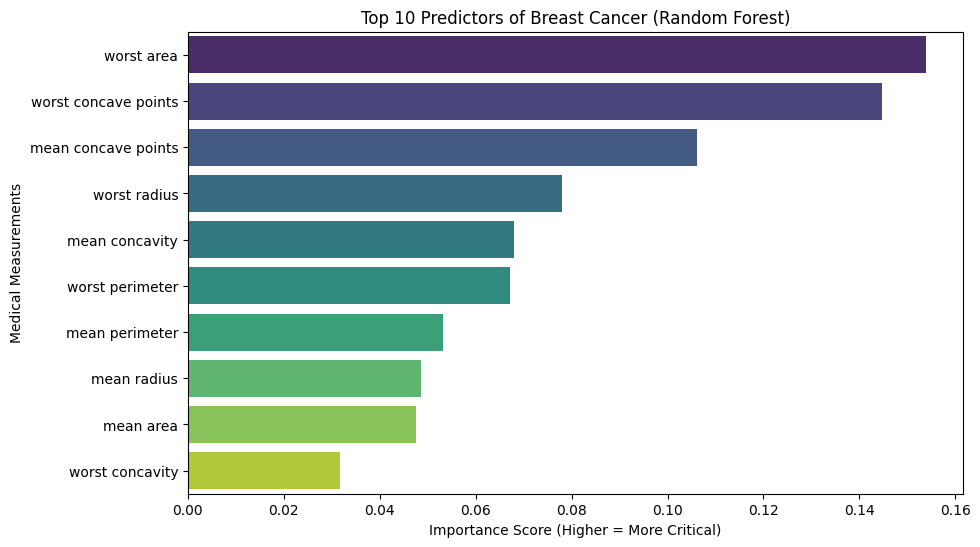

In [1]:
# --- 1. IMPORTS ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# --- 2. PREPARE DATA & MODEL ---
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train the Random Forest
# We need this specific model because it calculates "feature_importances_"
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 3. EXTRACT IMPORTANCE ---
# Get the raw numbers
importances = model.feature_importances_

# Create a table (DataFrame) to match Names with Numbers
feature_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': importances
})

# Sort the table: Highest importance on top
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# --- 4. VISUALIZATION (The Chart) ---
plt.figure(figsize=(10, 6))

# Draw the bar chart
# We use .head(10) to only show the Top 10 most important features
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10), palette='viridis')

# Add labels
plt.title("Top 10 Predictors of Breast Cancer (Random Forest)")
plt.xlabel("Importance Score (Higher = More Critical)")
plt.ylabel("Medical Measurements")

# Show the plot
plt.show()

/tmp/ipython-input-1816168179.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature.head(10), palette='viridis')


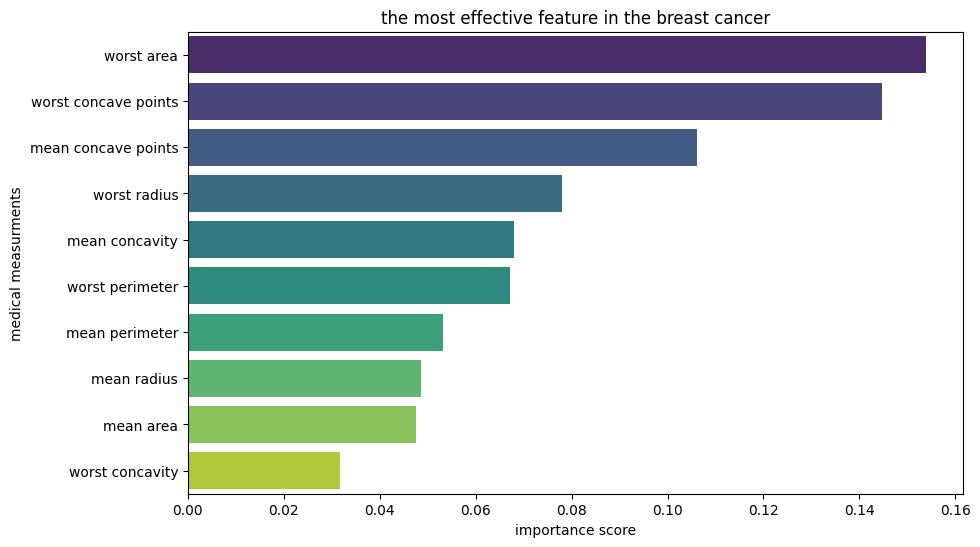

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. load the data
data = load_breast_cancer()
x = data.data
y = data.target

# 2. split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state=42)

# 3. train the model
model =RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# 4. importances
importances = model.feature_importances_
feature =pd.DataFrame({'feature':data.feature_names, 'importance':importances})

# 5. sorting and ranking
feature = feature.sort_values(by='importance', ascending =False)

# 6. viualization
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature.head(10), palette='viridis')
plt.title("the most effective feature in the breast cancer")
plt.xlabel("importance score")
plt.ylabel("medical measurments")
plt.show()
